# Demonstração do Filtro de Canny

O filtro de Canny é usado para se obter as bordas de uma imagem digital. Dito isto, inicialmente devemos observar melhor o que é uma imagem digital.

In [1]:
# Bibliotecas necessarias
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import sys

#### Uma imagem digital, conforme [?] define é um conjunto de pixels....

Podemos observar abaixo uma imagem representada em nosso monitor.

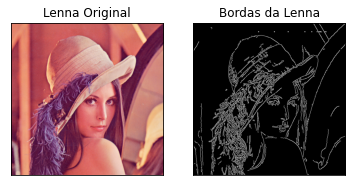

In [2]:
img = cv2.imread("images/lena_std.tif")[:,:,::-1]
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img)
plt.title('Lenna Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Bordas da Lenna'), plt.xticks([]), plt.yticks([])
plt.show()

### Também podemos representar como uma matriz, onde cada elemento representa um pixel com sua cor.

In [3]:
print("Matriz da imagem da Lenna")
print(img[:1]) # Apresentando apenas o primeiro elemento.

Matriz da imagem da Lenna
[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]]


### Para simplificar, podemos aplicar um filtro e representar a imagem em escala de cinza.

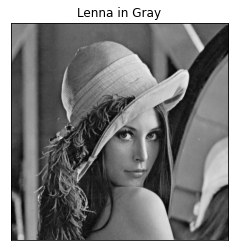

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Lenna in Gray'), plt.xticks([]), plt.yticks([])
plt.show()

### Além de facilitar outros processamentos, isso também diminui o tamanho da imagem.

In [5]:
print("Lenna in colors")
print(str((sys.getsizeof(img.tobytes()) // 1024)) + " Kb")
print()
print("Lanna in Gray")
print(str((sys.getsizeof(gray.tobytes()) // 1024)) + " Kb")


Lenna in colors
768 Kb

Lanna in Gray
256 Kb


### Usando a imagem em escala de cinza, podemos aplicar a transformada de Fourier e mostrar uma representação de sua magnitude.

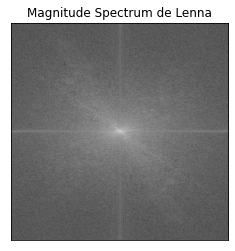

In [6]:
dft = cv2.dft(np.float32(gray),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum de Lenna'), plt.xticks([]), plt.yticks([])
plt.show()



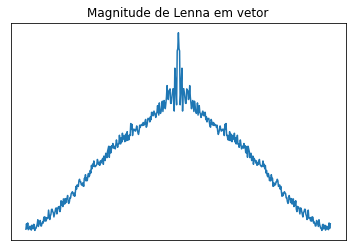

In [7]:
sample_angles = np.linspace(0,  2 * np.pi, len(magnitude_spectrum.sum(axis=0))) / np.pi*180
plt.plot(sample_angles, magnitude_spectrum.sum(axis=0))
plt.title('Magnitude de Lenna em vetor'), plt.xticks([]), plt.yticks([])
plt.show()  

### Podemos aplicar um filtra de Gauss para borrar a imagem.

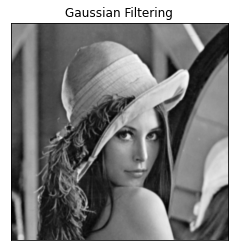

In [8]:
blur = cv2.GaussianBlur(gray,(5,5),0)

plt.imshow(blur, cmap = 'gray'),plt.title('Gaussian Filtering')
plt.xticks([]), plt.yticks([])
plt.show()

### Depois podemos observar novamente a magnitude da imagem e ver a diferença

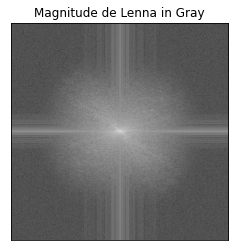

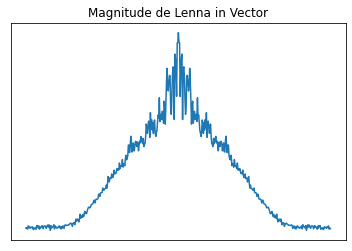

In [9]:
dft = cv2.dft(np.float32(blur),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum_blur = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(magnitude_spectrum_blur, cmap = 'gray')
plt.title('Magnitude de Lenna in Gray'), plt.xticks([]), plt.yticks([])
plt.show()

sample_angles_blur = np.linspace(0,  2 * np.pi, len(magnitude_spectrum_blur.sum(axis=0))) / np.pi*180
plt.plot(sample_angles_blur, magnitude_spectrum_blur.sum(axis=0))
plt.title('Magnitude de Lenna in Vector'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [11]:
print(gaussian_kernel(5, 1.4))

[[0.01054991 0.02267864 0.0292689  0.02267864 0.01054991]
 [0.02267864 0.04875119 0.06291796 0.04875119 0.02267864]
 [0.0292689  0.06291796 0.0812015  0.06291796 0.0292689 ]
 [0.02267864 0.04875119 0.06291796 0.04875119 0.02267864]
 [0.01054991 0.02267864 0.0292689  0.02267864 0.01054991]]


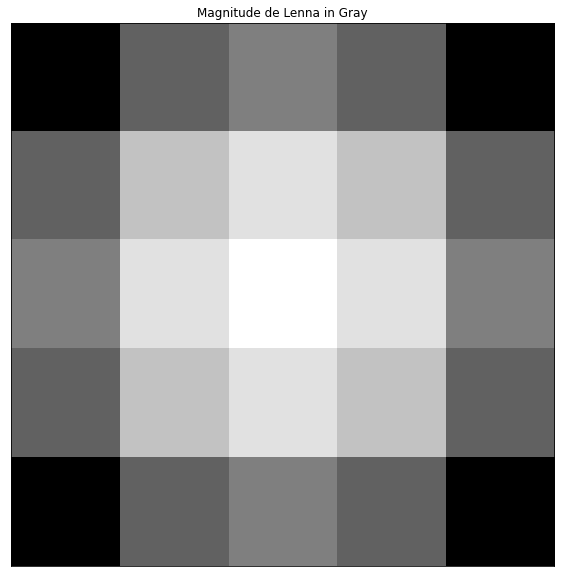

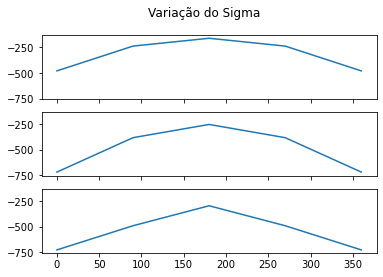

<Figure size 720x720 with 0 Axes>

In [19]:
dft1 = cv2.dft(np.float32(gaussian_kernel(5, 1)),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)
magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0],dft_shift1[:,:,1]))
sample_angles1 = np.linspace(0,  2 * np.pi, len(magnitude_spectrum1.sum(axis=0))) / np.pi*180

dft2 = cv2.dft(np.float32(gaussian_kernel(5, 1.4)),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)
magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1]))
sample_angles2 = np.linspace(0,  2 * np.pi, len(magnitude_spectrum2.sum(axis=0))) / np.pi*180

dft3 = cv2.dft(np.float32(gaussian_kernel(5, 2)),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift3 = np.fft.fftshift(dft3)
magnitude_spectrum3 = 20*np.log(cv2.magnitude(dft_shift3[:,:,0],dft_shift3[:,:,1]))
sample_angles3 = np.linspace(0,  2 * np.pi, len(magnitude_spectrum3.sum(axis=0))) / np.pi*180

plt.figure(figsize = (10,10))
plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude de Lenna in Gray'), plt.xticks([]), plt.yticks([])
plt.show()


fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Variação do Sigma')
plt.figure(figsize = (10,10))
axs[0].plot(sample_angles1, magnitude_spectrum1.sum(axis=0))
axs[1].plot(sample_angles2, magnitude_spectrum2.sum(axis=0))
axs[2].plot(sample_angles3, magnitude_spectrum3.sum(axis=0))
plt.show()

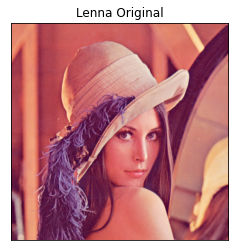

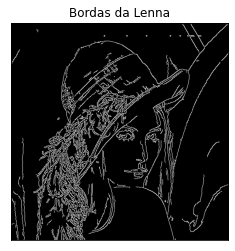

In [15]:
img = cv2.imread("images/lena_std.tif")[:,:,::-1]
edges = cv2.Canny(img,100,200)

plt.imshow(img)
plt.title('Lenna Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(edges,cmap = 'gray')
plt.title('Bordas da Lenna'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
x = np.matrix(np.arange(12).reshape((3,4))); x

matrix([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
x.max()

matrix([[ 8,  9, 10, 11]])

In [8]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [9]:
threshold(x)

(array([[  0, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]], dtype=int32),
 25,
 255)

In [10]:
gaussian_kernel(5, sigma=1.4)

NameError: name 'gaussian_kernel' is not defined

In [37]:
fig = plt.figure(magnitude_spectrum1.sum(axis=0))
fig, ax_lst = plt.subplots(1, 1)

TypeError: only size-1 arrays can be converted to Python scalars

In [33]:
, 

(array([  0.,  90., 180., 270., 360.]),
 array([-479.0386 , -236.52347, -160.0334 , -236.52345, -479.0386 ],
       dtype=float32))